<a href="https://colab.research.google.com/github/klfontus/Coursera_Capstone/blob/main/Data_Science_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> IBM Data Science Capstone Project
### <center> Title Here

This notebook will be the main notebook for this capstone project

In [1]:
import pandas as pd
import numpy as np


In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


#### To do


1.   Get population data from website for states and analyze
2.   Get population data for cities and analyze
3.   Write small hypothesis
4.   Get Sac neighborhood tables set up
5.   Get Austin neighborhood tables set up
6.   Get venue data from Foursquare
7.   Create clusters and do analysis





### California and Texas Population Analysis

In [3]:
import requests
from bs4 import BeautifulSoup

#### Creating tables for state and city population data from 2010-2020

In [4]:
def popTables(web_data):
  """Get Population Data table from website, input html data scraped using BeautifulSoup"""
  popData = pd.DataFrame(columns=["Year", "Population", "Growth Rate (%)"])

  tables = web_data.find_all('table')
  try:
    for index,table in enumerate(tables):
      if ("Historical Population Data" in str(table)):
          pop_index = index
  except:
    print("Table not found")
    return 

  pop_table = tables[pop_index]

  for row in pop_table.find_all('tr'):
    #print(row)
    if row.find('th'):
      continue
    col = row.find_all("td")
    year = int(col[0].text)
    if year > 2020: continue
    if year < 2010: break
    pop = int(col[1].text.replace(',',''))
    growth = float(col[2].text[:-1])
    popData.loc[len(popData)] = [year, pop, growth]

  #the table of the website has the data ordered descending from the most recent year so we're turning it around
  popData = popData.iloc[::-1]
  popData = popData.reset_index(drop=True)
  return popData



In [5]:
ca_pop_url = "https://www.macrotrends.net/states/california/population"
tx_pop_url = "https://www.macrotrends.net/states/texas/population"

In [6]:
ca_data  = requests.get(ca_pop_url).text
ca_pop_soup = BeautifulSoup(ca_data, 'html5lib')

tx_data  = requests.get(tx_pop_url).text
tx_pop_soup = BeautifulSoup(tx_data, 'html5lib')

In [7]:
ca_df = popTables(ca_pop_soup)
ca_df.head()

,Year,Population,Growth Rate (%)
0,2010.0,37319550.0,0.97
1,2011.0,37636311.0,0.85
2,2012.0,37944551.0,0.82
3,2013.0,38253768.0,0.81
4,2014.0,38586706.0,0.87


In [8]:
tx_df = popTables(tx_pop_soup)
tx_df.head()

,Year,Population,Growth Rate (%)
0,2010.0,25241897.0,1.77
1,2011.0,25645504.0,1.60
2,2012.0,26084120.0,1.71
3,2013.0,26479646.0,1.52
4,2014.0,26963092.0,1.83


In [9]:
sac_url = "https://www.macrotrends.net/cities/23121/sacramento/population"
au_url = "https://www.macrotrends.net/cities/22926/austin/population"

In [10]:
sac_data  = requests.get(sac_url).text
sac_soup = BeautifulSoup(sac_data, 'html5lib')

au_data  = requests.get(au_url).text
au_soup = BeautifulSoup(au_data, 'html5lib')

In [11]:
sac_df = popTables(sac_soup)
sac_df.head()

,Year,Population,Growth Rate (%)
0,2010.0,1733000.0,2.18
1,2011.0,1770000.0,2.14
2,2012.0,1808000.0,2.15
3,2013.0,1847000.0,2.16
4,2014.0,1887000.0,2.17


In [12]:
au_df = popTables(au_soup)
au_df.head()

,Year,Population,Growth Rate (%)
0,2010.0,1377000.0,4.24
1,2011.0,1434000.0,4.14
2,2012.0,1495000.0,4.25
3,2013.0,1558000.0,4.21
4,2014.0,1623000.0,4.17


#### Looking at the population data for each state and city

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import linear_model


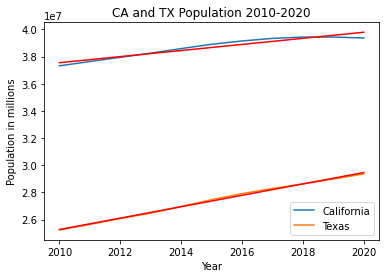

In [14]:
fig = plt.figure()



for frame in [ca_df, tx_df]:
  plt.plot(frame["Year"], frame["Population"])

labels = ["California", "Texas"]
plt.title("CA and TX Population 2010-2020")
plt.xlabel("Year")
plt.ylabel("Population in millions")

regr1 = linear_model.LinearRegression()
ca_trainx = np.asanyarray(ca_df[['Year']])
ca_trainy = np.asanyarray(ca_df[['Population']])
regr1.fit(ca_trainx, ca_trainy)

regr2 = linear_model.LinearRegression()
tx_trainx = np.asanyarray(tx_df[['Year']])
tx_trainy = np.asanyarray(tx_df[['Population']])
regr2.fit(tx_trainx, tx_trainy)

plt.plot(ca_trainx, regr1.coef_[0][0]*ca_trainx + regr1.intercept_[0], '-r')
plt.plot(tx_trainx, regr2.coef_[0][0]*tx_trainx + regr2.intercept_[0], '-r')


plt.legend(labels)
plt.show()

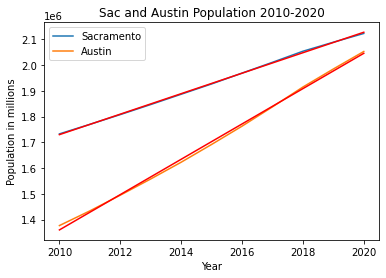

In [15]:
fig = plt.figure()

for frame in [sac_df, au_df]:
  plt.plot(frame["Year"], frame["Population"])

labels = ["Sacramento", "Austin"]
plt.title("Sac and Austin Population 2010-2020")
plt.xlabel("Year")
plt.ylabel("Population in millions")

regr3 = linear_model.LinearRegression()
sac_trainx = np.asanyarray(sac_df[['Year']])
sac_trainy = np.asanyarray(sac_df[['Population']])
regr3.fit(sac_trainx, sac_trainy)

regr4 = linear_model.LinearRegression()
au_trainx = np.asanyarray(au_df[['Year']])
au_trainy = np.asanyarray(au_df[['Population']])
regr4.fit(au_trainx, au_trainy)

plt.plot(sac_trainx, regr3.coef_[0][0]*sac_trainx + regr3.intercept_[0], '-r')
plt.plot(au_trainx, regr4.coef_[0][0]*au_trainx + regr4.intercept_[0], '-r')

plt.legend(labels)
plt.show()

At first look, both states and cities have upward trends in their population numbers over the past few years. The red Linear Regression line on each set of data shows not much variation of the data as there is a lot of overlap between lines. California has a much larger population which is reflected in the large gap between the two lines. It looks like the California line is plateauing, while Texas has a more steady upward slope. Sacramento has had a greater population than Austin, but the gap has been rapidly closing between the two cities. We'll look at the growth percentages to get a better idea of what is happening.

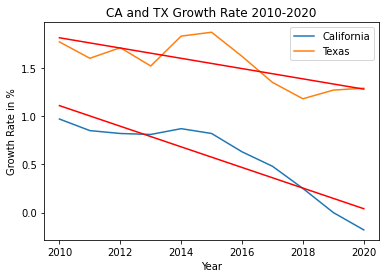

In [16]:
fig = plt.figure()

for frame in [ca_df, tx_df]:
  plt.plot(frame["Year"], frame["Growth Rate (%)"])

labels = ["California", "Texas"]
plt.title("CA and TX Growth Rate 2010-2020")
plt.xlabel("Year")
plt.ylabel("Growth Rate in %")

regr7 = linear_model.LinearRegression()
cag_trainx = np.asanyarray(ca_df[['Year']])
cag_trainy = np.asanyarray(ca_df[['Growth Rate (%)']])
regr7.fit(cag_trainx, cag_trainy)

regr8 = linear_model.LinearRegression()
txg_trainx = np.asanyarray(tx_df[['Year']])
txg_trainy = np.asanyarray(tx_df[['Growth Rate (%)']])
regr8.fit(txg_trainx, txg_trainy)

plt.plot(cag_trainx, regr7.coef_[0][0]*cag_trainx + regr7.intercept_[0], '-r')
plt.plot(txg_trainx, regr8.coef_[0][0]*txg_trainx + regr8.intercept_[0], '-r')


plt.legend(labels)
plt.show()

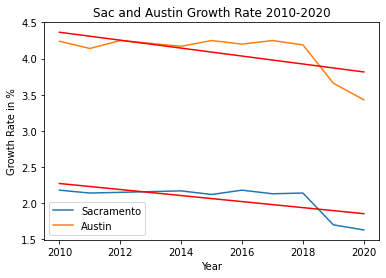

In [17]:
fig = plt.figure()

for frame in [sac_df, au_df]:
  plt.plot(frame["Year"], frame["Growth Rate (%)"])

labels = ["Sacramento", "Austin"]
plt.title("Sac and Austin Growth Rate 2010-2020")
plt.xlabel("Year")
plt.ylabel("Growth Rate in %")

regr5 = linear_model.LinearRegression()
sacg_trainx = np.asanyarray(sac_df[['Year']])
sacg_trainy = np.asanyarray(sac_df[['Growth Rate (%)']])
regr5.fit(sacg_trainx, sacg_trainy)

regr6 = linear_model.LinearRegression()
aug_trainx = np.asanyarray(au_df[['Year']])
aug_trainy = np.asanyarray(au_df[['Growth Rate (%)']])
regr6.fit(aug_trainx, aug_trainy)

plt.plot(sacg_trainx, regr5.coef_[0][0]*sacg_trainx + regr5.intercept_[0], '-r')
plt.plot(aug_trainx, regr6.coef_[0][0]*aug_trainx + regr6.intercept_[0], '-r')

plt.legend(labels)
plt.show()

In [18]:
print("Austin's average growth rate from 2010 to 2020 is ",au_df["Growth Rate (%)"].mean())
print("Texas's average growth rate from 2010 to 2020 is ",tx_df["Growth Rate (%)"].mean())
print("Sacramento's average growth rate from 2010 to 2020 is ",sac_df["Growth Rate (%)"].mean())
print("California's average growth rate from 2010 to 2020 is ",ca_df["Growth Rate (%)"].mean())

Austin's average growth rate from 2010 to 2020 is  4.089999999999999
Texas's average growth rate from 2010 to 2020 is  1.5463636363636366
Sacramento's average growth rate from 2010 to 2020 is  2.0636363636363635
California's average growth rate from 2010 to 2020 is  0.5745454545454546


For our purposes, the growth rate data gives us a clearer picture of the population trends. Texas has had a larger growth rate the past ten years. The sharp decline that started for both in 2015 is interesting, but since they match each other almost perfectly, I presume it is from an external reason that has noting to do with our problem. But we see that since then, Califorria's growth rate has continued to decline, while Texas's has begun to rise again. 

Austin and Sacramento's growth rates also mirror each other, with the Texas city having the higher rate. Both have been holding steady-ish until 2018 where both experienced a sharp decline, and neither have increased since. 

However overall, for al the data, the Linear Regression Lines tell us that there is had been a trend of declining growth rate that will continue to the future. 

Overall, while the population continues to grow, California and Sacramento's population groath is slowing. This may be due to a "max exodus" that offsets any natural positive growth. The declines in growth were unexpected for me, but seeing that the Texas and Austin population growth has been much larger gives me confirmation that they are having a lot of people moving there. 

People are not necessarily moving from Sacramento at a high rate, but there are plenty of people moving to Austin, and people are moving to Texas at a higher rate than to California. Our scenario of someone moving from Sacramento to Austin is not implausible, so we will continue with our venue analysis to see if we can find factors that would help people decide to move there.

For comparison, the current global population growth rate is 1%, and the United States' is 0.5%. The averages for all of our data sets is above the rate for the US, while California is the only one below the world's.

### Sacramento and Austin Venue Analysis

#### First we created Data Frames that lists the neighborhoods for each city

In [19]:
sac_url = 'https://statisticalatlas.com/place/California/Sacramento/Overview'
au_url = 'https://statisticalatlas.com/place/Texas/Austin/Overview'

In [20]:
sac_n_data  = requests.get(sac_url).text
sac_n_soup = BeautifulSoup(sac_n_data, 'html5lib')

au_n_data  = requests.get(au_url).text
au_n_soup = BeautifulSoup(au_n_data, 'html5lib')

In [21]:
def getNeigh(soup):

  df = pd.DataFrame(columns=["Neighborhood"])

  #infoTable = soup.find_all(class_ = "info-table")
  tableRows = soup.find_all(class_ = "info-table-tr row")
  
  for index, row in enumerate(tableRows):
    if ("Neighborhoods" in str(row)):
      hood_index = index

  hoods = tableRows[hood_index]
  for i in hoods.find_all('a'):
    #print(i)
    df.loc[len(df)] = i.text
  
  return df


In [78]:
sac_neigh = getNeigh(sac_n_soup)
sac_neigh.head()
sac_neigh.shape

(123, 1)

In [79]:
au_neigh = getNeigh(au_n_soup)
au_neigh.head()
au_neigh.shape

(72, 1)

#### We need the geographical coordinates for each neighborhood in order to work with the Foursquare Data

In [24]:
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

In [80]:
def getCoords(df, city, state):
  """finds the coordinates of a neighborhood given a data frame that lists just the names of the neighborhoods"""
  lat = []
  lon = []

  geolocator = Nominatim(user_agent="hood_explorer")
  
  for i in range(len(df)):
    
    hold = df.loc[i, "Neighborhood"]
    
    address = '{}, {}, {}'.format(hold, city, state)
    #try to find the address of each neighborhood, if it cannot be found then put in null for lat and long
    try:
      location = geolocator.geocode(address)
      lat.insert(len(lat), location.latitude)
      lon.insert(len(lon), location.longitude)
      
    except:
      lat.insert(len(lat), "null")
      lon.insert(len(lon), "null")
  
  df["Latitude"] = lat
  df["Longitude"] = lon
  #drop all the neighborhoods that we sould not get coordinate data on
  drop_index = df[ (df['Latitude'] == "null")].index
  df.drop(drop_index, inplace=True)




In [81]:
getCoords(sac_neigh, 'Sacramento', 'CA')
sac_neigh.shape          

(85, 3)

In [82]:
sac_neigh.head()

,Neighborhood,Latitude,Longitude
0,Airport,38.6872,-121.59
1,Alhambra Triangle,38.5722,-121.465
2,Alkali Flat,38.586,-121.494
3,American River Parkway,38.6221,-121.303
4,Arden Fair,38.6015,-121.427


In [83]:
getCoords(au_neigh, 'Austin', 'TX')
au_neigh.shape

(67, 3)

In [165]:
au_neigh.head()

,Neighborhood,Latitude,Longitude
0,Allandale,30.3393,-97.747
1,Barton Creek,30.2656,-97.764
2,Barton Hills,30.2516,-97.7841
3,Bouldin,30.2557,-97.7555
4,Brentwood,30.3313,-97.7365


#### Let's look at the neighborhoods on a map to see if we get a good covereage of each city

In [50]:
import folium

In [93]:
# create map
geolocator2 = Nominatim(user_agent="sac_map")
sac_location = geolocator2.geocode("Sacramento, CA")
sac_map = folium.Map(location=[sac_location.latitude, sac_location.longitude], zoom_start=11)

# add markers to the map
for lat, lon, n in zip(sac_neigh['Latitude'], sac_neigh['Longitude'], sac_neigh['Neighborhood']):
    label = folium.Popup(str(n), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(sac_map)
sac_map
       

In [89]:
#We need to drop these rows because of error in the geolocator that shows them outside of Sacramento
print(sac_neigh[sac_neigh["Neighborhood"]=="College-Glen"])
print(sac_neigh[sac_neigh["Neighborhood"]=="Point West"])
print(sac_neigh[sac_neigh["Neighborhood"]=="Medical Center"])
print(sac_neigh[sac_neigh["Neighborhood"]=="Richmond Grove"])

    Neighborhood Latitude Longitude
15  College-Glen -33.8874   18.5608
   Neighborhood Latitude Longitude
78   Point West  38.7118  -9.14078
      Neighborhood Latitude Longitude
54  Medical Center   33.699  -117.777
      Neighborhood Latitude Longitude
83  Richmond Grove  37.9037  -122.314


In [90]:
sac_neigh.drop([15, 78, 54, 83], axis=0, inplace=True)
sac_neigh.reset_index()
print(sac_neigh.shape)
sac_neigh.head()

(81, 3)


,Neighborhood,Latitude,Longitude
0,Airport,38.6872,-121.59
1,Alhambra Triangle,38.5722,-121.465
2,Alkali Flat,38.586,-121.494
3,American River Parkway,38.6221,-121.303
4,Arden Fair,38.6015,-121.427


In [86]:
# create map
geolocator3 = Nominatim(user_agent="au_map")
au_location = geolocator3.geocode("Austin, TX")
au_map = folium.Map(location=[au_location.latitude, au_location.longitude], zoom_start=10)

# add markers to the map
for lat, lon, n in zip(au_neigh['Latitude'], au_neigh['Longitude'], au_neigh['Neighborhood']):
    label = folium.Popup(str(n), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(au_map)
au_map

The neighborhoods cover a wide range of the city on both maps, both the city centers and the suburban areas. We had to drop some neighborhhods from the Sacramento list because the geolocator was picking up coordinates from places outside of Sacramento that had the same name. 

#### Defining my Foursquare credentials

In [28]:
CLIENT_ID = 'VLVGEEHYISQQVPNBN4MXVXRYYFF1F424SYHP1P51VBNZ1CDI' # your Foursquare ID
CLIENT_SECRET = 'FU1ZPCQCQNTWLF5LJH4IGECWHUT1DZIFEKWWXX4Y1WQKUDN4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

#### Creating a data frame that has the venue information for the neighborhoods in each city

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [94]:
sac_venues = getNearbyVenues(sac_neigh["Neighborhood"], sac_neigh["Latitude"], sac_neigh["Longitude"])
print(sac_venues.shape)
sac_venues.head()

(3214, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Airport,38.687223,-121.59037,"""Leap"" (Red Rabbit)",38.691921,-121.591633,Public Art
1,Airport,38.687223,-121.59037,Southwest Airlines,38.691898,-121.591770,Airport Service
2,Airport,38.687223,-121.59037,Sacramento International Airport (SMF) (Sacram...,38.692532,-121.591032,Airport
3,Airport,38.687223,-121.59037,National Car Rental,38.681931,-121.587622,Rental Car Location
4,Airport,38.687223,-121.59037,Vino Volo,38.692905,-121.587238,Wine Bar


In [95]:
au_venues = getNearbyVenues(au_neigh["Neighborhood"], au_neigh["Latitude"], au_neigh["Longitude"])
print(au_venues.shape)
au_venues.head()

(3145, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allandale,30.339309,-97.746972,Barley Swine,30.341256,-97.738458,New American Restaurant
1,Allandale,30.339309,-97.746972,Bufalina Due,30.341030,-97.738422,Pizza Place
2,Allandale,30.339309,-97.746972,Lick Ice Creams Burnet Road,30.341143,-97.738408,Ice Cream Shop
3,Allandale,30.339309,-97.746972,Yard Bar,30.342881,-97.738871,Bar
4,Allandale,30.339309,-97.746972,Asahi Imports,30.336347,-97.739225,Supermarket


In [96]:
print('There are {} unique venue categories in Sacramento.'.format(len(sac_venues['Venue Category'].unique())))
print('There are {} unique venue categories in Austin.'.format(len(au_venues['Venue Category'].unique())))

There are 284 unique venue categories in Sacramento.
There are 323 unique venue categories in Austin.


In [97]:
austin_u = []
sac_u = []

for cat in au_venues["Venue Category"].unique():
  if cat not in sac_venues["Venue Category"].unique():
    austin_u.insert(len(austin_u), cat)

for cat in sac_venues["Venue Category"].unique():
  if cat not in au_venues["Venue Category"].unique():
    sac_u.insert(len(sac_u), cat)
  
print("There are {} categories that exist in Sacramento, that are not in Austin".format(len(sac_u)))
print("There are {} categories that exist in Austin, that are not in Sacrameto".format(len(austin_u)))


There are 59 categories that exist in Sacramento, that are not in Austin
There are 98 categories that exist in Austin, that are not in Sacrameto


There are 225 venue types that are in both cities. We can explore the differences in the cities after we do the clustering, so we can see what each city lacks in relation to the other.

#### Neighborhood Analysis

In [48]:
# one hot encoding
def neighGrouped(df):
  """Does One Hot Encoding to each neighborhood venue df and then takes the mean of the columns so we can see the frequency of each venue category"""
  
  df_onehot = pd.get_dummies(df[['Venue Category']], prefix="", prefix_sep="")

  # add neighborhood column back to dataframe
  df_onehot['Neighborhood'] = df['Neighborhood'] 

  # move neighborhood column to the first column
  fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
  df_onehot = df_onehot[fixed_columns]
  df_grouped = df_onehot.groupby('Neighborhood').mean().reset_index()


  return df_grouped

In [99]:
sac_grouped = neighGrouped(sac_venues)
au_grouped = neighGrouped(au_venues)

In [100]:
sac_grouped.head()

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Airport,Airport Service,Airport Terminal,Alternative Healer,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Beer Bar,Beer Garden,Big Box Store,Bike Shop,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brasserie,Breakfast Spot,Brewery,...,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Steakhouse,Storage Facility,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tattoo Parlor,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Train,Train Station,Travel Agency,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Winery,Wings Joint,Women's Store,Yoga Studio
0,Airport,0.0,0.0,0.000000,0.044444,0.244444,0.022222,0.0,0.044444,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.022222,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.044444,0.00,0.000000,0.000000,0.00
1,Alhambra Triangle,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.021277,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.010638,0.031915,0.0,0.00,0.010638,0.010638,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.021277,0.000000,...,0.0,0.010638,0.0,0.0,0.0,0.010638,0.00,0.0,0.010638,0.0,0.000000,0.021277,0.0,0.0,0.0,0.0,0.000000,0.0,0.010638,0.000000,0.021277,0.00,0.0,0.000000,0.010638,0.000000,0.0,0.00,0.00,0.0,0.010638,0.000000,0.0,0.010638,0.0,0.000000,0.00,0.000000,0.000000,0.00
2,Alkali Flat,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.060000,0.0,0.01,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.01,0.0,0.020000,0.000000,0.030000,0.0,0.01,0.010000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.01,0.000000,0.020000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.03,0.0,0.000000,0.0,0.000000,0.010000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.010000,0.03,0.0,0.010000,0.000000,0.000000,0.0,0.01,0.02,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.010000,0.01,0.000000,0.000000,0.01
3,American River Parkway,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.00
4,Arden Fair,0.0,0.0,0.011236,0.000000,0.000000,0.000000,0.0,0.022472,0.0,0.00,0.0,0.011236,0.0,0.0,0.0,0.0,0.0,0.0,0.011236,0.00,0.0,0.011236,0.011236,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.011236,0.011236,0.0,0.00,0.022472,0.011236,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.011236,0.022472,0.0,0.0,0.0,0.0,0.011236,0.0,0.000000,0.022472,0.011236,0.00,0.0,0.011236,0.000000,0.011236,0.0,0.00,0.00,0.0,0.000000,0.011236,0.0,0.000000,0.0,0.000000,0.00,0.011236,0.011236,0.00


In [166]:
au_grouped.head(7)

,Neighborhood,ATM,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Board Shop,Boat Launch,Bookstore,Botanical Garden,...,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tour Provider,Toy / Game Store,Track,Trade School,Trail,Train Station,Tree,Used Bookstore,Vegetarian / Vegan Restaurant,Vehicle Inspection Station,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Waterfall,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Allandale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021739,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.021739,0.021739,0.021739,0.0,0.0,0.00,0.021739,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.021739,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.021739,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.021739,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,Barton Creek,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030928,0.000000,0.0,0.0,0.010309,0.0,0.00,0.010309,0.020619,0.0,0.0,0.0,0.020619,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.010309,0.0,0.0,0.0,0.0,0.000000,0.010309,...,0.000000,0.0,0.010309,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.030928,0.010309,0.0,0.0,0.0,0.010309,0.0,0.051546,0.010309,0.010309,0.000000,0.010309,0.0,0.0,0.0,0.010309,0.00,0.0,0.0,0.0,0.010309,0.0,0.0,0.0,0.0,0.030928
2,Barton Hills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.030303,0.000000,0.030303,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.030303,0.000000,...,0.000000,0.0,0.000000,0.0,0.090909,0.0,0.0,0.0,0.030303,0.0,0.000000,0.000000,0.030303,0.000000,0.000000,0.030303,0.0,0.0,0.0,0.000000,0.0,0.030303,0.000000,0.000000,0.000000,0.030303,0.0,0.0,0.0,0.030303,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.030303
3,Bouldin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.01,0.000000,0.000000,0.0,0.0,0.0,0.010000,0.000000,0.000000,0.000000,0.020000,0.000000,0.0,0.0,0.01,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.010000,0.0,0.0,0.0,0.010000,0.0,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.010000,0.0,0.0,0.0,0.000000,0.01,0.0,0.0,0.0,0.010000,0.0,0.0,0.0,0.0,0.010000
4,Brentwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016393,0.016393,0.0,0.0,0.000000,0.0,0.00,0.016393,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.016393,0.000000,0.016393,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.016393,0.000000,...,0.016393,0.0,0.016393,0.0,0.049180,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.016393,0.000000,0.016393,0.0,0.0,0.0,0.016393,0.0,0.000000,0.000000,0.000000,0.016393,0.000000,0.0,0.0,0.0,0.016393,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.016393
5,Cat Hollow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00

#### Now we run K-Means clustering on each set of neighborhoods based on common venues

In [102]:
from sklearn.cluster import KMeans

In [157]:
kclusters = 5

sac_grouped_clustering = sac_grouped.drop('Neighborhood', 1)
au_grouped_clustering = au_grouped.drop('Neighborhood', 1)

sac_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sac_grouped_clustering)
au_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(au_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print("Sac first ten cluster labels: ", sac_kmeans.labels_[0:10])
print("Austin first ten cluster labels: ", au_kmeans.labels_[0:10])
print(len(au_kmeans.labels_))

Sac first ten cluster labels:  [2 2 2 4 2 2 0 0 2 2]
Austin first ten cluster labels:  [2 2 2 2 2 0 2 2 2 2]
66


#### Inserting the cluster labels onto a data frame with the most common venues for each neighborhood

In [182]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

def mostCommonVenuesClusters(df_grouped, city_venues, kmeans_results):
  num_top_venues = 10

  indicators = ['st', 'nd', 'rd']

  # create columns according to number of top venues
  columns = ['Neighborhood']
  for ind in np.arange(num_top_venues):
      try:
          columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
      except:
          columns.append('{}th Most Common Venue'.format(ind+1))

  # create a new dataframe
  neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
  neighborhoods_venues_sorted['Neighborhood'] = df_grouped['Neighborhood']

  for ind in np.arange((df_grouped).shape[0]):
      neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

  # add clustering labels
  neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans_results.labels_)

  #not all the neighborhoods have venues, so we only take the neighborhoods that returned venues
  neigh_merged = pd.DataFrame(columns=["Neighborhood", "Latitude", "Longitude"])
  neigh_merged = city_venues["Neighborhood"].unique()
  print(city_venues["Neighborhood Latitude"].unique())
  neigh_merged["Latitude"] = city_venues["Neighborhood Latitude"].unique()
  neigh_merged["Longitude"] = city_venues["Neighborhood Longitude"].unique()

  # merge grouped data with neighborhood list to add latitude/longitude for each neighborhood
  neigh_merged = neigh_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
  
  return neigh_merged

In [183]:
sac_clusters_venues = mostCommonVenuesClusters(sac_grouped, sac_venues, sac_kmeans)
sac_clusters_venues.head()

[38.68722345 38.5722333  38.5860162  38.6221269  38.60152995 38.5974144
 38.6155114  38.4882906  38.6094     38.5649414  38.59213435 38.56831425
 38.546118   38.5324066  38.5423773  38.661168   38.5473589  38.6360152
 38.6351818  38.5235876  38.57432885 38.661454   38.562614   38.5495794
 38.4618527  38.5249067  38.6184097  38.6348764  38.5107405  38.4933189
 38.6274043  38.52885475 38.650594   38.5576836  38.41783065 38.5286522
 38.5215711  38.4831762  38.6573594  38.6274994  38.6367976  38.6699213
 38.560739   38.6193488  38.6710975  38.6294018  38.6248735  38.600064
 38.5810606  38.6789915  38.5966817  38.6221153  38.6085362  38.54305565
 38.6612923  38.56989425 38.5504873  38.56816825 38.5436373  38.614723
 38.63840505 38.6575983  38.6676603  38.503796   38.6055713  38.48661605]


IndexError: ignored

In [111]:
au_clusters_venues = mostCommonVenuesClusters(au_grouped, au_neigh, au_kmeans)
au_clusters_venues.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allandale,30.3393,-97.747,2.0,Food Truck,Spa,Pharmacy,Pizza Place,Park,Mobile Phone Shop,Mexican Restaurant,Lounge,Food & Drink Shop,Supermarket
1,Barton Creek,30.2656,-97.764,2.0,Food Truck,Gym / Fitness Center,Park,Trail,Yoga Studio,Spa,Coffee Shop,American Restaurant,Theater,BBQ Joint
2,Barton Hills,30.2516,-97.7841,2.0,Taco Place,Burger Joint,Coffee Shop,Convenience Store,Yoga Studio,Playground,Tex-Mex Restaurant,Bar,Tapas Restaurant,Bookstore
3,Bouldin,30.2557,-97.7555,2.0,Coffee Shop,Ice Cream Shop,Park,Restaurant,Burger Joint,Food Truck,Salon / Barbershop,Japanese Restaurant,New American Restaurant,Mexican Restaurant
4,Brentwood,30.3313,-97.7365,2.0,Taco Place,Coffee Shop,Food Truck,Liquor Store,Gas Station,Burger Joint,Sandwich Place,Mexican Restaurant,Pet Store,Pizza Place


In [163]:
for i in range(au_clusters_venues.shape[0]):
  if au_clusters_venues.iloc[i]["Neighborhood"] not in au_neigh["Neighborhood"]:
    print(au_clusters_venues.iloc[i]["Neighborhood"])

Allandale
Barton Creek
Barton Hills
Bouldin
Brentwood
Cantarra
Cat Hollow
Central East Austin
Chestnut
Coronado Hills
Crestview
Dawson
Dessau Estates
Downtown
East Cesar Chavez
East Congress
Franklin Park
Galindo
Garrison Park
Gateway
Georgian Acres
Govalle
Hancock
Heritage Hills
Highland
Holly
Hyde Park
Johnston Terrace
MLK
MLK 183
Mckinney
Montopolis
North Austin
North Burnett
North Lamar
North Loop
North Shoal Creek
North University
Old West Austin
Onion Creek
Parker Lane
Pecan Springs Springdale
Pleasant Valley
Riverside
Rosedale
Rosewood
South Lamar
South Manchaca
South River City
Southeast
Spring Hill Village
St. Edwards
St. Johns
Triangle State
University Hills
University of Texas
Wells Branch
West Congress
West Gate
West Oak Hill
West University
Wildflower
Windsor Hills
Windsor Park
Windsor Road
Wooten
Zilker


In [151]:
#cluster labels are not ints for some reason
#au_clusters_venues = au_clusters_venues["Cluster Labels"].astype(int)
print(au_clusters_venues["Cluster Labels"][0:20])
#for i in range(au_clusters_venues.shape[0]):
#  print(i)
#  if (au_clusters_venues.iloc[i]["Cluster Labels"].dtype != float):
#    print(i)

0     2.0
1     2.0
2     2.0
3     2.0
4     2.0
5     NaN
6     0.0
7     2.0
8     2.0
9     2.0
10    2.0
11    2.0
12    2.0
13    0.0
14    2.0
15    2.0
17    2.0
18    2.0
19    2.0
20    2.0
Name: Cluster Labels, dtype: float64


#### Let's visualize each city's clusters

In [113]:
#for the cluster label colors
import matplotlib.cm as cm
import matplotlib.colors as colors

In [116]:
# create map
sac_map_clusters = folium.Map(location=[sac_location.latitude, sac_location.longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sac_clusters_venues['Latitude'], sac_clusters_venues['Longitude'], sac_clusters_venues['Neighborhood'], sac_clusters_venues['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(sac_map_clusters)
       
sac_map_clusters


In [119]:
# create map
au_map_clusters = folium.Map(location=[au_location.latitude, au_location.longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(au_clusters_venues['Latitude'], au_clusters_venues['Longitude'], au_clusters_venues['Neighborhood'], au_clusters_venues['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(au_map_clusters)
       
au_map_clusters


TypeError: ignored